# Run memento and compare to estimates from cellxgene estimators

In [1]:
import tiledb
import tiledbsoma as soma
from somacore import ExperimentAxisQuery, AxisQuery
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import itertools
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import time
import scanpy as sc

In [2]:
import sys
sys.path.append('/home/ubuntu/Github/scrna-parameter-estimation/')
import memento

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
cube_path = '/home/ubuntu/Github/memento-cxg/'
save_path = '/home/ubuntu/results/'

### Concept diagram

In [7]:
adata = sc.read('/home/ubuntu/Data/mementocxg/cc4284ca-8118-4b18-b66a-46c279dc56a1.h5ad')

In [8]:
adata.obs.head(2)

,library_uuid,assay_ontology_term_id,mapped_reference_annotation,is_primary_data,cell_type_ontology_term_id,author_cell_type,cell_state,sample_uuid,tissue_ontology_term_id,development_stage_ontology_term_id,disease_state,suspension_enriched_cell_types,suspension_uuid,suspension_type,donor_id,self_reported_ethnicity_ontology_term_id,organism_ontology_term_id,disease_ontology_term_id,sex_ontology_term_id,Processing_Cohort,ct_cov,ind_cov,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CAAGGCCAGTATCGAA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,3332f018-936e-4c4c-9105-99d9503db5a3,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,0a1148dc-356f-4dc4-9c32-bf0823257d93,UBERON:0000178,HsapDv:0000122,na,peripheral blood mononuclear cell,cc418a0a-d636-4eca-a44c-db537d30b486,cell,HC-546,HANCESTRO:0008,NCBITaxon:9606,PATO:0000461,PATO:0000383,4.0,T4_naive,HC-546,"CD4-positive, alpha-beta T cell",10x 3' v2,normal,Homo sapiens,female,blood,Asian,28-year-old human stage
CTAACTTCAATGAATG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,70a004b7-4a17-4702-8910-4557aa0c4279,EFO:0009899,GENCODE 19,True,CL:0000860,cM,na,577bce84-8d37-4851-9fb4-53f9467699ba,UBERON:0000178,HsapDv:0000139,managed,peripheral blood mononuclear cell,3e67947f-bd15-4d41-910a-89488e72c50a,cell,1132,HANCESTRO:0005,NCBITaxon:9606,MONDO:0007915,PATO:0000383,4.0,NaN,1132_1132,classical monocyte,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,45-year-old human stage


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


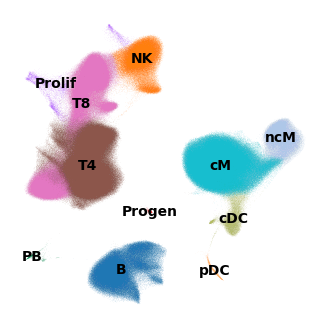

Text(0, 0.5, '')

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.umap(adata, color='author_cell_type', legend_loc='on data', ax=ax, frameon=False,save='_all_cells.png', title='')
ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylabel(None)


In [10]:
adata.obs['author_cell_type'].nunique()

11

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


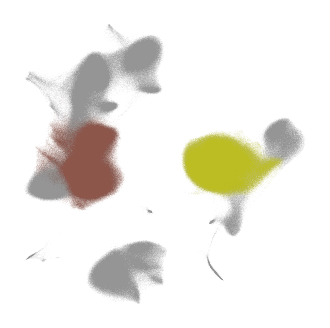

Text(0, 0.5, '')

In [12]:
cell_types = adata.obs['author_cell_type'].cat.categories.tolist()
greys = sns.color_palette("grey", n_colors=adata.obs['author_cell_type'].nunique()).as_hex()
grey_color = greys[-5]
greys = np.array([grey_color for i in range(len(cell_types))])
curr_pal = plt.rcParams['axes.prop_cycle'].by_key()['color'].copy()

ct1, ct2 = 'T4', 'cM'

ct1_idx, ct2_idx = cell_types.index(ct1), cell_types.index(ct2)
new_pal = greys.copy()
new_pal[ct1_idx] = curr_pal[ct1_idx]
new_pal[ct2_idx] = curr_pal[ct2_idx]
# new_pal = mpl.colors.Colormap(new_pal)

fig, ax = plt.subplots(figsize=(4,4))
sc.pl.umap(adata, 
           color='author_cell_type',ax=ax, frameon=False, 
           palette=list(new_pal), legend_loc=None, title='', save=f'_{ct1}_{ct2}.png')
ax.set_xlabel(None)
ax.set_ylabel(None)

In [15]:
order = list(itertools.combinations(cell_types, 2))


In [18]:
import random

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


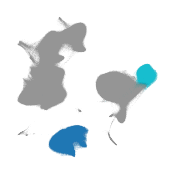

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


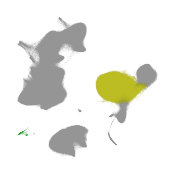

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


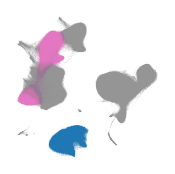

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


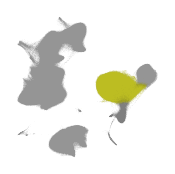

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


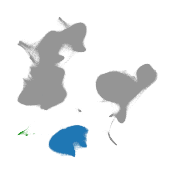

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


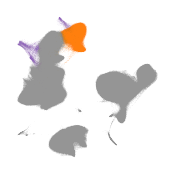

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


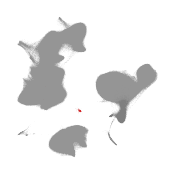

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


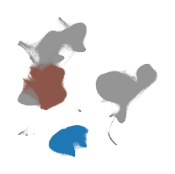

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


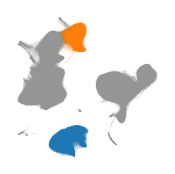

In [22]:
# ct1, ct2 = 'T4', 'cM'
order = list(itertools.combinations(cell_types, 2))
random.shuffle(order)

for ct1, ct2 in order[:10]:
    ct1_idx, ct2_idx = cell_types.index(ct1), cell_types.index(ct2)
    new_pal = greys.copy()
    
    if ct1_idx > 9 or ct2_idx > 9:
        continue
    new_pal[ct1_idx] = curr_pal[ct1_idx]
    new_pal[ct2_idx] = curr_pal[ct2_idx]
    # new_pal = mpl.colors.Colormap(new_pal)

    fig, ax = plt.subplots(figsize=(2,2))
    sc.pl.umap(adata, 
               color='author_cell_type',ax=ax, frameon=False, 
               palette=list(new_pal), legend_loc=None, title='', save=f'_{ct1}_{ct2}.png')
    ax.set_xlabel(None)
    ax.set_ylabel(None)

### Run memento

lets try cM vs T4

In [8]:
CUBE_TILEDB_DIMS_OBS = [
    "cell_type",
    "dataset_id",
]

CUBE_TILEDB_ATTRS_OBS = [
    "assay",
    "suspension_type",
    "donor_id",
    "disease",
    "sex"
]

CUBE_LOGICAL_DIMS_OBS = CUBE_TILEDB_DIMS_OBS + CUBE_TILEDB_ATTRS_OBS

CUBE_DIMS_VAR = ['feature_id']

TILEDB_SOMA_BUFFER_BYTES = 2**31

OBS_VALUE_FILTER = "is_primary_data == True and dataset_id ==  '218acb0f-9f2f-4f76-b90b-15a4b7c7f629' and donor_id == '1259'" # Lupus dataset


In [13]:
exp_uri = 's3://cellxgene-data-public/cell-census/2023-10-30/soma/census_data/homo_sapiens'
measurement_name ='RNA'

In [14]:
with soma.Experiment.open(uri=exp_uri,
                          context=soma.SOMATileDBContext().replace(tiledb_config={
                              "soma.init_buffer_bytes": TILEDB_SOMA_BUFFER_BYTES,
                              "vfs.s3.region":"us-west-2",
                              "vfs.s3.no_sign_request":True})
                          ) as exp:

    query = exp.axis_query(measurement_name=measurement_name,
                           obs_query=AxisQuery(value_filter=OBS_VALUE_FILTER),
                           # Note: Must use *all* genes to compute size factors correctly, even when var filter is
                           # being used for testing
                           var_query=AxisQuery())

In [15]:
lupus_adata=query.to_anndata('raw')

In [16]:
lupus_adata.var.index = lupus_adata.var.feature_id.tolist()

In [17]:
def run_memento(ct1, ct2):
    
    adata = lupus_adata[lupus_adata.obs['cell_type'].isin([ct1, ct2])].copy().copy()

    adata.obs['q'] = 0.07
    memento.setup_memento(adata, q_column='q', trim_percent=1, filter_mean_thresh=0.1, shrinkage=0)
    memento.create_groups(adata, label_columns=['cell_type'])
    memento.compute_1d_moments(adata, min_perc_group=.7)

    meta_df = memento.get_groups(adata)
    meta_df['intercept'] = 1
    covariate = meta_df[['intercept']]
    treatment = (meta_df[['cell_type']] == ct2).astype(float)
        

    memento.ht_1d_moments(
        adata, 
        covariate=covariate,
        treatment=treatment, 
        num_boot=5000, 
        verbose=1,
        num_cpus=13,
        resample_rep=False,
        approx=True)
    memento_results = memento.get_1d_ht_result(adata)
    
    return memento_results

In [18]:
memento_results = run_memento('classical monocyte','CD4-positive, alpha-beta T cell')

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=13)]: Done 174 tasks      | elapsed:    4.6s
[Parallel(n_jobs=13)]: Done 562 tasks      | elapsed:    8.2s
[Parallel(n_jobs=13)]: Done 1262 tasks      | elapsed:   15.5s
[Parallel(n_jobs=13)]: Done 1498 out of 1498 | elapsed:   18.3s finished


### Run memento-cxg

Take the estimators from the cube and perform DE

In [19]:
def _fit_mv_regressor(mean, var):
	"""
		Perform regression of the variance against the mean.
	"""
	
	cond = (mean > 0) & (var > 0)
	m, v = np.log(mean[cond]), np.log(var[cond])
	
	poly = np.polyfit(m, v, 2)
	return poly
	f = np.poly1d(z)

def _residual_variance(mean, var, mv_fit):
	
	cond = (mean > 0) & (var > 0)
	rv = np.zeros(mean.shape)*np.nan
	
	f = np.poly1d(mv_fit)
	with np.errstate(invalid='ignore'):
		rv[cond] = np.exp(np.log(var[cond]) - f(np.log(mean[cond])))
	return rv

def compute_residual_variance(df):
    
    m = df['mean']
    v = df['var']
    vv = df['sev']
    mv_fit = _fit_mv_regressor(m, v)
    rv = _residual_variance(m, v, mv_fit)
    df['res_var'] = rv

In [20]:
donor = '1259'

In [21]:
cube_path + 'estimators_cube'

'/home/ubuntu/Github/memento-cxg/estimators_cube'

In [22]:
estimators = tiledb.open(cube_path + 'estimators_cube').df[:]

TileDBError: [TileDB::Array] Error: Cannot open array; Array does not exist.

In [ ]:
estimators = tiledb.open(cube_path + 'estimators_cube').df[:].query(f'donor_id == "{donor}"')\
    .rename(columns={
    'feature_id':'cell_type',
    'cell_type':'dataset_id',
    'dataset_id':'feature_id',
})

In [ ]:
def compute_cxg_pvalues(ct1, ct2):
    
    ct1_df = estimators.query(f'cell_type == "{ct1}"').copy()
    ct2_df = estimators.query(f'cell_type == "{ct2}"').copy()
    compute_residual_variance(ct1_df)
    compute_residual_variance(ct2_df)
    
    merged = ct1_df.merge(ct2_df, on='feature_id', suffixes=('_ct1', '_ct2'))

    lfc = np.log(merged['mean_ct2'].values/merged['mean_ct1'].values)
    log_mean_se_1 = (np.log(merged['mean_ct1'] + merged['sem_ct1']) - np.log(merged['mean_ct1'] - merged['sem_ct1']))/2
    log_mean_se_2 = (np.log(merged['mean_ct2'] + merged['sem_ct2']) - np.log(merged['mean_ct2'] - merged['sem_ct2']))/2
    se_lfc = np.sqrt((log_mean_se_2**2 + log_mean_se_1**2)).values
    de_pvalues = stats.norm.sf(np.abs(lfc), loc=0, scale=se_lfc)*2

    dv_lfc = np.log(merged['res_var_ct2'].values/merged['res_var_ct1'].values)
    se_dv_lfc = np.sqrt((merged['selv_ct1']**2 + merged['selv_ct2']**2)).values
    dv_pvalues = stats.norm.sf(np.abs(dv_lfc), loc=0, scale=se_dv_lfc)*2

    cxg_results = pd.DataFrame(
        zip(
            merged['feature_id'].values,
            lfc,
            se_lfc,
            de_pvalues,
            dv_lfc,
            se_dv_lfc,
            dv_pvalues),
        columns=['gene', 'cxg_de_coef', 'cxg_de_se', 'cxg_de_pval', 'cxg_dv_coef', 'cxg_dv_se', 'cxg_dv_pval'])
    return cxg_results

In [ ]:
cxg_results = compute_cxg_pvalues('classical monocyte','CD4-positive, alpha-beta T cell')

In [ ]:
cxg_results = cxg_results.dropna()

### Compare the results

In [ ]:
merged_results = memento_results.merge(cxg_results, on='gene')

In [ ]:
merged_results['cxg_de_logp'] = -np.log10(merged_results['cxg_de_pval'])
merged_results['mem_de_logp'] = -np.log10(merged_results['de_pval'])

merged_results['cxg_dv_logp'] = -np.log10(merged_results['cxg_dv_pval'])
merged_results['mem_dv_logp'] = -np.log10(merged_results['dv_pval'])

In [ ]:
print(stat.pearsonr(

In [ ]:
plt.figure(figsize=(2.5,1.5))
to_show = merged_results.query('mem_de_logp < 200 & cxg_de_logp < 200')

plt.scatter(
    to_show['de_coef'],
    to_show['cxg_de_coef'],
    s=3)
plt.title('mean LFC')
plt.ylabel('Precomputed')
plt.plot([-2, 2], [-2, 2], '--', color='k')
plt.xlabel('Default')
plt.savefig('de_coef_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(2.5,1.5))
to_show = merged_results.query('mem_de_logp < 200 & cxg_de_logp < 200')

plt.scatter(
    to_show['mem_de_logp'],
    to_show['cxg_de_logp'],
    s=3)
plt.title('mean -log10(P)')
plt.ylabel('Precomputed')
plt.plot([0, 200], [0, 200], '--', color='k')
plt.xlabel('Default')
plt.savefig('de_pval_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(2.5,1.5))
to_show = merged_results.query('dv_coef < 6 & cxg_dv_coef < 6 & mem_dv_logp < 25 & cxg_dv_logp < 25')

plt.scatter(
    to_show['dv_coef'],
    to_show['cxg_dv_coef'],
    s=3)
plt.title('variability LFC')
plt.ylabel('Precomputed')
plt.plot([-2, 2], [-2, 2], '--', color='k')
plt.xlabel('Default')
plt.savefig('dv_coef_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(2.5,1.5))
to_show = merged_results.query('dv_coef < 6 & cxg_dv_coef < 6 & mem_dv_logp < 25 & cxg_dv_logp < 25')
plt.scatter(
    to_show['mem_dv_logp'],
    to_show['cxg_dv_logp'],
    s=3)
plt.title('variability -log10(P)')
plt.plot([0, 20], [0, 20], '--', color='k')
plt.ylabel('Precomputed')
plt.xlabel('Default')
plt.savefig('dv_pval_comparison.png', dpi=300, bbox_inches='tight')

### Compare runtimes

In [27]:
cell_types = lupus_adata.obs['cell_type'].drop_duplicates().tolist()

In [69]:
# Time cxg

num_cts = len(cell_types)
cxg_times = []
for nct in range(2, num_cts):
    
    cts_to_compare = itertools.combinations(cell_types[:nct], 2)
    
    start = time.time()
    for ct1, ct2 in cts_to_compare:
        
        # a = run_memento(ct1, ct2)
        b = compute_cxg_pvalues(ct1, ct2)
    duration = time.time()-start
    cxg_times.append(duration)


In [28]:
num_cts = len(cell_types)


In [ ]:
# Time memento
num_trial = 10
num_cts = len(cell_types)
memento_times = np.zeros((num_cts-1, num_trial))

for idx, nct in enumerate(range(2, num_cts+1)):
    
    cts_to_compare = list(itertools.combinations(cell_types[:nct], 2))
    
    for trial in range(num_trial):
        start = time.time()
        
        for ct1, ct2 in cts_to_compare:
            a = run_memento(ct1, ct2)

        end = time.time()
        memento_times[idx, trial] = end-start

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=13)]: Done 174 tasks      | elapsed:    3.8s
[Parallel(n_jobs=13)]: Done 627 tasks      | elapsed:    8.0s


In [29]:
num_comparisons = []
for nct in range(2, num_cts+1):
    
    cts_to_compare = itertools.combinations(cell_types[:nct], 2)
    num_comparisons.append(len(list(cts_to_compare)))

In [30]:
cxg_times = [0.0445709228515625,
 0.12334084510803223,
 0.24467754364013672,
 0.4052596092224121,
 0.5705969333648682,
 0.78609299659729,
 1.0434541702270508,
 1.396212100982666,
 1.4767653942108154]

memento_times = [16.082085132598877,
 46.88715410232544,
 86.9343409538269,
 131.8815257549286,
 161.52750897407532,
 211.55276083946228,
 266.297087430954,
 295.0561339855194,
 314.1077857017517]

In [31]:
num_comparisons = []
for nct in range(2, num_cts):
    
    cts_to_compare = itertools.combinations(cell_types[:nct], 2)
    num_comparisons.append(len(list(cts_to_compare)))

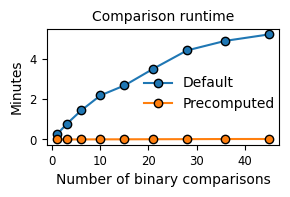

In [37]:
plt.figure(figsize=(3,1.5))
plt.plot(num_comparisons, np.array(memento_times)/60, '-o', markeredgecolor='k')
plt.plot(num_comparisons, np.array(cxg_times)/60, '-o', markeredgecolor='k')
plt.legend(['Default', 'Precomputed'], frameon=False,bbox_to_anchor=(0.7,0.7), loc='upper center')
plt.xlabel('Number of binary comparisons')
plt.ylabel('Minutes')
plt.title('Comparison runtime')
# plt.ylim(-50, 600)
plt.savefig('comparison_runtime.pdf', bbox_inches='tight')

In [170]:
lupus_adata_copy = lupus_adata.copy()
lupus_adata_copy.obs['q'] = 0.1

In [171]:
start = time.time()
memento.setup_memento(lupus_adata_copy, q_column='q', trim_percent=1, filter_mean_thresh=0.1, shrinkage=0)
print(time.time()-start)

0.21629118919372559


In [172]:
cxg_precompute_time = 557.3624973297119
default_precompute_time = 0.21629118919372559

In [224]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

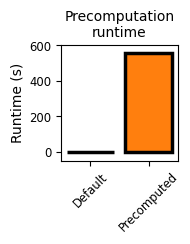

In [265]:
plt.figure(figsize=(1.5,1.5))
plt.bar([0, 1], [default_precompute_time, cxg_precompute_time], color=colors[:2], linewidth=2.5, edgecolor='k')
plt.ylabel('Runtime (s)')
plt.xticks([0, 1], ['Default', 'Precomputed'], rotation=45)
plt.ylim(-50, 600)
plt.title('Precomputation\nruntime')
plt.savefig('precomputation_runtime.pdf', bbox_inches='tight')